### Raciocínio Analítico - Análise dos Dados do Airbnb

O Airbnb começou em 2008, quando dois designers que tinham um espaço sobrando hospedaram três viajantes que procuravam um lugar para ficar. Agora, milhões de anfitriões e viajantes optam por criar uma conta gratuita no Airbnb para poderem anunciar seu espaço e reservar acomodações únicas, em qualquer lugar do mundo. Além disso, os anfitriões de experiências do Airbnb compartilham suas paixões e interesses com viajantes e moradores locais.

Podemos considerá-lo como uma plataforma que oferece opções além de hotéis para a hospedagem de clientes. É permitido anunciar um espaço disponível para alugar durante um curto período, como uma casa, ou mesmo um quarto e também podem reservar acomodações em qualquer lugar do mundo.

No final de 2018, a Startup fundada há 10 anos, já havia hospedado mais de 300 milhões de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais e se tornando uma das maiores do mundo.

<img src ="img.jpg" width = "80%">
                             
<center>Photo by <a href="https://unsplash.com/@stephen2002?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Stephen Wheeler</a> on <a href="https://unsplash.com/photos/hBh9JbyeCtg?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
    </center>
  

Você trabalha na divisão América Latina do Airbnb e está comparando a operação do Airbnb nos 4 principais países da empresa na região: Brasil, México, Argentina e Colômbia.
Um dos **objetivos da divisão é aumentar a quantidade de diárias reservadas por turistas estrangeiros nas hospedagens disponíveis na América Latina**. Para a realização das atividades, você conta com essa base de dados com informações sobre as diferentes hospedagens disponíveis e a demanda
das mesmas ao longo do tempo.

### Obtenção dos Dados

Para essa análise será baixado o arquivo disponível [aqui](https://docs.google.com/spreadsheets/d/10XiW4y9bQ323wkCYh3gMvqP7SWgTsAAdpusxg_38krQ/edit#gid=515346924).

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, median_absolute_error


%matplotlib inline
# tamanho dos gráficos
plt.rcParams["figure.figsize"] = [10,5]
# tamanho dos dados
plt.rcParams["font.size"] = 12
warnings.filterwarnings('ignore')

df = pd.read_excel("Airbnb.xlsx", sheet_name = "Imoveis")

### Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `Nome do local`: Esta coluna representa o título ou descrição curta da acomodação. Geralmente, os anfitriões usam isso para dar uma visão geral da sua propriedade. Exemplos podem incluir "Loft Moderno no Centro" ou "Casa de Praia com Piscina".

* `Localização`: Refere-se ao endereço ou área exata onde a propriedade está situada. Pode incluir informações como a cidade, o bairro e até mesmo referências próximas, como "próximo ao Parque Central".

* `País`: Indica em qual dos quatro principais países da América Latina (Brasil, México, Argentina, Colômbia) a acomodação está localizada.

* `Tipo de acomodação`: Classificação da propriedade com base em sua estrutura e oferta. Exemplos incluem "Quarto Inteiro", "Casa Inteira", "Quarto Compartilhado" e assim por diante.

* `Classificação`: Baseado nas avaliações e feedback dos hóspedes anteriores, esta coluna representa a média de estrelas que a acomodação recebeu, geralmente numa escala de 1 a 5.

* `Comodidades`: Uma lista de facilidades e serviços oferecidos pela acomodação. Isso pode incluir "Wi-Fi", "Piscina", "Cozinha Equipada", entre outros.

* `Políticas de cancelamento`: Define os termos e condições para cancelar uma reserva. Alguns anfitriões podem oferecer cancelamento gratuito até certo período, enquanto outros podem ter políticas mais rigorosas.

* `Preço`: O custo da acomodação por noite. Esta coluna pode ser essencial para determinar a faixa de preço das propriedades nos diferentes países e como isso se relaciona com a demanda.

* `Número de reservas no ano`: Esta coluna indica quantas vezes a acomodação foi reservada durante o ano. Isso pode ajudar a identificar quais propriedades são mais populares ou em demanda.

* `Número de Fotos`: Indica quantas imagens foram carregadas pelo anfitrião para representar sua propriedade. Isso pode ser uma indicação da transparência e do esforço do anfitrião em mostrar sua acomodação.

### Definição do Problema

Problema: Baixa reserva de turistas estrangeiros nas hospedagens disponíveis na América Latina

Objetivo: Aumentar a quantidade de diárias reservadas por turistas estrangeiros nas hospedagens disponíveis na América Latina



### Análise Exploratória de Dados - E.D.A

Primeiramente irei analisar as informações mais imediatas que temos sobre os dados.

In [2]:
print("Entradas: ", df[df.columns[0]].count())
print("Variáveis: ", df.shape[1])

Entradas:  49
Variáveis:  10


In [3]:
# verificar as 5 primeiras entradas do dataset
df.head()

,Nome do local,Localização,País,Tipo de acomodação,Classificação,Comodidades,Políticas de cancelamento,Preço,Número de reservas no ano,Número de Fotos
0,Hostel Montanha,San Andrés,Colômbia,Hostel,5 estrelas,"Wi-Fi, café da manhã",7 dias antes,30,11,5
1,Mirliban,Buenos Aires,Argentina,Apartamento,5 estrelas,"Wi-Fi, ar condicionado",72 horas,10,25,7
2,Estrela Dourada,Guadalajara,México,Hotel,5 estrelas,"Piscina, recepção",reembolsável,14,73,12
3,Mar Azul Beach,Fortaleza,Brasil,Hotel,5 estrelas,"Wi-Fi, armários",48 horas antes,35,162,2
4,Montanha Mágica,Curitiba,Brasil,Quarto,4 estrelas,"Piscina, churrasqueira",7 dias antes,48,200,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Nome do local              49 non-null     object
 1   Localização                49 non-null     object
 2   País                       49 non-null     object
 3   Tipo de acomodação         49 non-null     object
 4   Classificação              49 non-null     object
 5   Comodidades                49 non-null     object
 6   Políticas de cancelamento  49 non-null     object
 7   Preço                      49 non-null     int64 
 8   Número de reservas no ano  49 non-null     int64 
 9   Número de Fotos            49 non-null     int64 
dtypes: int64(3), object(7)
memory usage: 4.0+ KB


Não há variáveis nulas e o tipo de dado está coerente com a sua informação.

#### 1. Análise das Principais Métricas de Preço das Diárias nos 4 Países

In [5]:
df.groupby('País')['Preço'].describe()

,count,mean,std,min,25%,50%,75%,max
País,,,,,,,,
Argentina,10.0,168.100000,78.297793,10.0,137.00,183.5,223.75,272.0
Brasil,15.0,163.200000,81.600245,35.0,101.50,170.0,218.50,300.0
Colômbia,14.0,145.928571,61.537311,30.0,114.75,160.0,193.50,249.0
México,10.0,152.700000,72.562693,14.0,139.00,156.5,183.25,289.0


Pode-se observar que:

* A média de preço da Colômbia é a menor entre os países, porém o país possui o menor desvio padrão.
* O Brasil é o país com maior desvio padrão de preços.
* O Brasil tem a maior amplitude de preço, com uma diferença de 265 (300-35).
* A Argentina possui a menor amplitude de preço entre os quatro países, com uma diferença de 262 (272-10).
* Apesar da Colômbia ter a menor média, Argentina e México possuem o menor preço mínimo de hospedagem.
* Para todos os países, a mediana está próxima da média, o que sugere uma distribuição simétrica, exceto a Argentina, que possui a mediana maior que a média e sugere uma distribuição assimétrica à esquerda.

#### 2. Distribuição de Preço dos Imóveis no Brasil

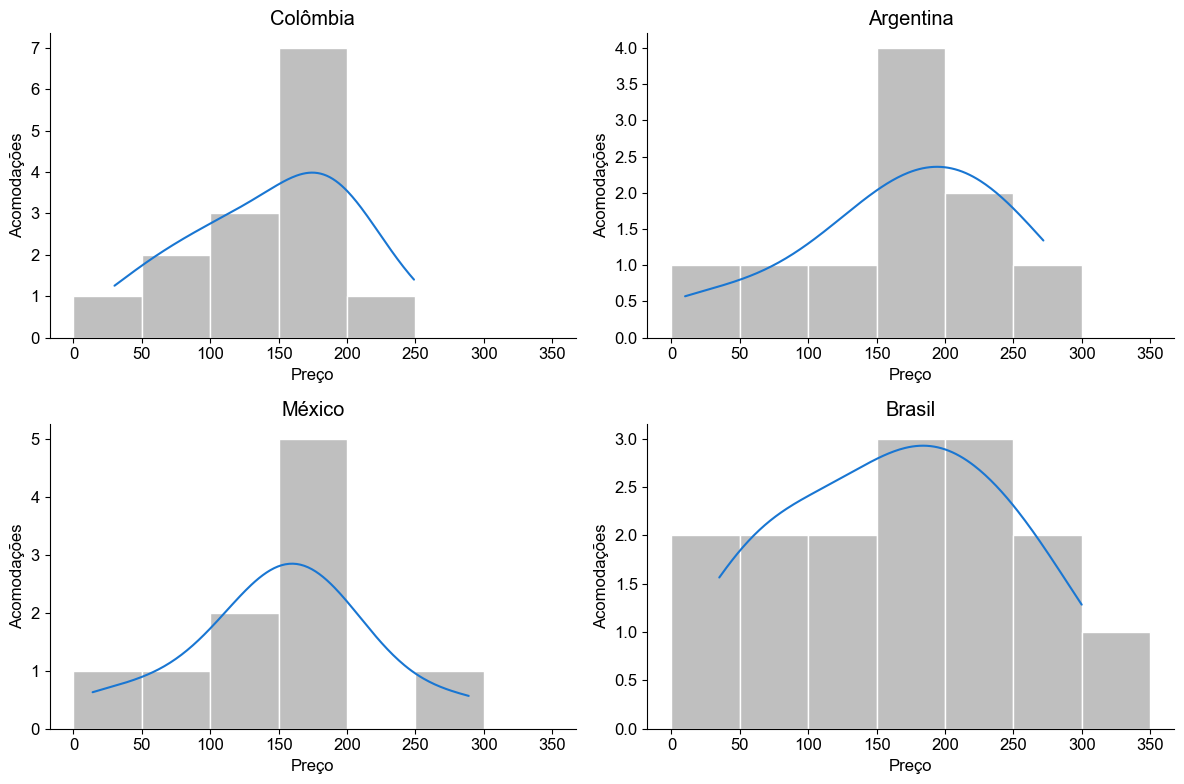

In [6]:
paises = df['País'].unique()

# Define o estilo e o tamanho do gráfico
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))
sns.set_style("whitegrid", {'axes.grid' : False})

cor_histograma = "gray"

# Cria o histograma
sns.histplot(df['Preço'].loc[df['País'] == paises[0]], kde=True, bins=range(0, 400, 50), color= cor_histograma, ax = ax[0][0])
sns.histplot(df['Preço'].loc[df['País'] == paises[1]], kde=True, bins=range(0, 400, 50), color=cor_histograma, ax = ax[0][1])
sns.histplot(df['Preço'].loc[df['País'] == paises[2]], kde=True, bins=range(0, 400, 50), color=cor_histograma, ax = ax[1][0])
sns.histplot(df['Preço'].loc[df['País'] == paises[3]], kde=True, bins=range(0, 400, 50), color=cor_histograma, ax = ax[1][1])

# Adiciona título e rótulos
ax[0][0].set_title(paises[0])
ax[0][0].lines[0].set_color('#1976D2')
ax[0][0].set_xlabel("Preço", fontsize=12)
ax[0][0].set_ylabel("Acomodações", fontsize=12)
ax[0][0].grid(False)

ax[0][1].set_title(paises[1])
ax[0][1].lines[0].set_color('#1976D2')
ax[0][1].set_xlabel("Preço", fontsize=12)
ax[0][1].set_ylabel("Acomodações", fontsize=12)

ax[1][0].set_title(paises[2])
ax[1][0].lines[0].set_color('#1976D2')
ax[1][0].set_xlabel("Preço", fontsize=12)
ax[1][0].set_ylabel("Acomodações", fontsize=12)

ax[1][1].set_title(paises[3])
ax[1][1].lines[0].set_color('#1976D2')
ax[1][1].set_xlabel("Preço", fontsize=12)
ax[1][1].set_ylabel("Acomodações", fontsize=12)


# Remove a borda superior e direita para limpeza
sns.despine()

plt.tight_layout()

A quantidade de dados são poucas, mas ainda assim é possível observar que:

* O México se aproxima de uma distribuição normal
* A Argentina se assemelha a uma distribuição assimétrica à esquerda
* Brasil e Colômbia se assemelham a uma curva normal

Embora certas tendências possam ser observadas nos dados atuais, a confiabilidade dessas observações é reduzida devido ao pequeno tamanho da amostra. Abaixo, realizarei um teste KS para verificar a distribuição no Brasil.

In [7]:
data = df['Preço'].loc[df['País'] == 'Brasil']

ks_statistic, ks_p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))

print("Estatística KS:", ks_statistic)
print("Valor-p:", ks_p_value)

# Avaliar o resultado
if ks_p_value > 0.05:
    print("Não rejeitamos a hipótese nula. Os dados seguem uma distribuição normal.")
else:
    print("Rejeitamos a hipótese nula. Os dados não seguem uma distribuição normal.")

Estatística KS: 0.09898788527329688
Valor-p: 0.9951600610339052
Não rejeitamos a hipótese nula. Os dados seguem uma distribuição normal.


Apesar de não rejeitarmos a hipótese nula, como citado previamente, a quantidade de dados limitados da nossa amostra diminui o poder estatístico. Logo, a forma das distribuições devem ser interpretadas com cautela.

#### 3. Funil de Conversão

Um funil de conversão é uma representação visual ou conceitual do processo que os clientes ou usuários passam, desde o primeiro contato com a marca ou produto até a conclusão de um objetivo específico, que geralmente é uma conversão. Em marketing digital e análise de comércio eletrônico, essa "conversão" muitas vezes se refere a uma venda, mas também pode se referir a outras ações desejadas, como inscrever-se em uma newsletter, fazer o download de um aplicativo ou preencher um formulário de contato.

<img src = 'funil.png' width = '80%'>

Aqui está uma decomposição do funil de conversão:

1. **Consciência (Awareness)**: É a etapa superior do funil e representa as pessoas que tomaram conhecimento da sua marca, produto ou serviço. Isso pode acontecer através de anúncios, pesquisas em mecanismos de busca, redes sociais, entre outros.

2. **Interesse (Interest)**: Depois de conhecer a marca, alguns desses indivíduos mostrarão interesse em saber mais. Eles podem visitar o site, seguir a marca nas redes sociais ou se inscrever para receber e-mails.

3. **Consideração (Consideration)**: Nesta fase, os potenciais clientes estão avaliando ativamente a oferta e comparando-a com outras opções disponíveis no mercado.

4. **Intenção (Intent)**: Os usuários nesta etapa têm uma intenção clara de comprar ou converter, mas podem precisar de mais informações ou garantias.

5. **Conversão (Conversion)**: Este é o objetivo final do funil, onde os usuários tomam a ação desejada, seja comprando um produto, inscrevendo-se para um webinar, entre outros.

6. **Pós-conversão (Post-conversion)**: Embora muitas vezes não seja visualizada como parte do funil de conversão tradicional, esta etapa envolve reter e engajar clientes após a conversão inicial, levando-os a repetir compras ou ações e a se tornar defensores da marca.

Abaixo, realizaremos o funil de conversão para cada um dos países.

#### Brasil

In [8]:
# Defina as linhas iniciais e finais que você deseja ler
linha_inicial = 1  
linha_final = 25   

# Calcule o número de linhas a serem lidas
n_linhas = linha_final - linha_inicial + 1

# Faça a leitura das linhas desejadas do arquivo Excel
df_br = pd.read_excel("Airbnb.xlsx", sheet_name="Fluxo de reserva de imóvel - Br", skiprows=range(1, linha_inicial), nrows=n_linhas)

In [9]:
df_br.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,14583827,11521224,10023465,7617833,5256305
1,2021-02-01,14574634,11513961,10017146,7613031,5252991
2,2021-03-01,15303366,12089659,10518004,7993683,5515641
3,2021-04-01,16068534,12694142,11043904,8393367,5791423
4,2021-05-01,16871961,13328849,11596099,8813035,6080994


#### Funil 1: Da etapa `Home` para `Resultado de Busca`

In [10]:
(df_br['Resultado de busca'].sum()/df_br['Home'].sum()).round(2)

0.79

#### Funil 2: Da etapa `Resultado de busca` para `Detalhes do imóvel`

In [11]:
(df_br['Detalhes do imóvel'].sum()/df_br['Resultado de busca'].sum()).round(2)

0.87

#### Funil 3: Da etapa `Detalhes do imóvel` para `Check-out`

In [12]:
(df_br['Check-out'].sum()/df_br['Detalhes do imóvel'].sum()).round(2)

0.76

#### Funil 4: Da etapa `Check-out` para `Conclusão da reserva`

In [13]:
(df_br['Conclusão da reserva'].sum()/df_br['Check-out'].sum()).round(2)

0.69

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2:
(0.79 - 0.87)/0.79 = -0.1013 ou -10.13%

2. Da etapa 2 para etapa 3:
(0.87 - 0.76)/0.87 = 0.1264 ou 12.64%

3. Da etapa 3 para etapa 4:
(0.76 - 0.69)/0.76 = 0.0921 ou 9.21%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4

Conversão geral = 0.79 × 0.87 × 0.76 × 0.69

Conversão geral ≈ 0.36

Conclui-se que:
* No Brasil, a maior perda de visitantes ocorre da etapa "Detalhes do Imóvel para Check-out"
* A conversão geral no Brasil é de 36%.

#### Colômbia



In [14]:
# Defina as linhas iniciais e finais que você deseja ler
linha_inicial = 31  
linha_final = 55   

# Calcule o número de linhas a serem lidas
n_linhas = linha_final - linha_inicial + 1

# Faça a leitura das linhas desejadas do arquivo Excel
df_clmb = pd.read_excel("Airbnb.xlsx", sheet_name="Fluxo de reserva de imóvel - Br", skiprows=range(1, linha_inicial), nrows=n_linhas)

In [15]:
df_clmb.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,11566484,9368852,5808688,4066082,1463789
1,2021-02-01,11559193,9362946,5805027,4063519,1462867
2,2021-03-01,12137152,9831093,6095278,4266695,1536010
3,2021-04-01,12744010,10322648,6400042,4480029,1612811
4,2021-05-01,13381211,10838781,6720044,4704031,1693451


#### Funil 1: Da etapa `Home` para `Resultado de Busca`

In [16]:
(df_clmb['Resultado de busca'].sum()/df_clmb['Home'].sum()).round(2)

0.81

#### Funil 2: Da etapa `Resultado de busca` para `Detalhes do imóvel`

In [17]:
(df_clmb['Detalhes do imóvel'].sum()/df_clmb['Resultado de busca'].sum()).round(2)

0.62

#### Funil 3: Da etapa `Detalhes do imóvel` para `Check-out`

In [18]:
(df_clmb['Check-out'].sum()/df_clmb['Detalhes do imóvel'].sum()).round(2)

0.7

#### Funil 4: Da etapa `Check-out` para `Conclusão da reserva`

In [19]:
(df_clmb['Conclusão da reserva'].sum()/df_clmb['Check-out'].sum()).round(2)

0.36

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2:
(0.81 - 0.62)/0.81 = 0.23 ou 23%

2. Da etapa 2 para etapa 3:
(0.62 - 0.7)/0.62 = -0.129 ou -12.90%

3. Da etapa 3 para etapa 4:
(0.7 - 0.36)/0.7 = 0.48 ou 48%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4

Conversão geral = 0.81 × 0.62 × 0.7 × 0.36

Conversão geral ≈ 0.12

Conclui-se que:
* Na Colômbia, a maior perda de visitantes ocorre da etapa "Da etapa Check-out para Conclusão da reserva"
* A conversão geral na Colômbia é de 12%.

#### México

In [20]:
# Defina as linhas iniciais e finais que você deseja ler
linha_inicial = 61  
linha_final = 85   

# Calcule o número de linhas a serem lidas
n_linhas = linha_final - linha_inicial + 1

# Faça a leitura das linhas desejadas do arquivo Excel
df_mxc = pd.read_excel("Airbnb.xlsx", sheet_name="Fluxo de reserva de imóvel - Br", skiprows=range(1, linha_inicial), nrows=n_linhas)

In [21]:
df_mxc.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,12371109,7546376,6640811,3918079,3056101
1,2021-02-01,12363311,7541619,6636625,3915609,3054175
2,2021-03-01,12981476,7918700,6968456,4111389,3206884
3,2021-04-01,13630550,8314635,7316879,4316959,3367228
4,2021-05-01,14312077,8730367,7682723,4532807,3535589


#### Funil 1: Da etapa `Home` para `Resultado de Busca`

In [22]:
(df_mxc['Resultado de busca'].sum()/df_mxc['Home'].sum()).round(2)

0.61

#### Funil 2: Da etapa `Resultado de busca` para `Detalhes do imóvel`

In [23]:
(df_mxc['Detalhes do imóvel'].sum()/df_mxc['Resultado de busca'].sum()).round(2)

0.88

#### Funil 3: Da etapa `Detalhes do imóvel` para `Check-out`

In [24]:
(df_mxc['Check-out'].sum()/df_mxc['Detalhes do imóvel'].sum()).round(2)

0.59

#### Funil 4: Da etapa `Check-out` para `Conclusão da reserva`

In [25]:
(df_mxc['Conclusão da reserva'].sum()/df_mxc['Check-out'].sum()).round(2)

0.78

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2:
(0.61 - 0.88)/0.61 = -0.44 ou -44%

2. Da etapa 2 para etapa 3:
(0.88 - 0.59)/0.88 = 0.32 ou 32%

3. Da etapa 3 para etapa 4:
(0.59 - 0.78)/0.59 = -0.32 ou -32%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4

Conversão geral = 0.61 × 0.88 × 0.59 × 0.78

Conversão geral ≈ 0.24

Conclui-se que:
* No México, a maior perda de visitantes ocorre da etapa "Da etapa Detalhes do Imóvel para Check-out"
* A conversão geral no México é de 24%.

#### Argentina

In [26]:
# Defina as linhas iniciais e finais que você deseja ler
linha_inicial = 90  
linha_final = 114  

# Calcule o número de linhas a serem lidas
n_linhas = linha_final - linha_inicial + 1

# Faça a leitura das linhas desejadas do arquivo Excel
df_agt = pd.read_excel("Airbnb.xlsx", sheet_name="Fluxo de reserva de imóvel - Br", skiprows=range(1, linha_inicial), nrows=n_linhas)

In [27]:
df_agt.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,10057812,7543359,4903183,2647719,1191474
1,2021-02-01,10051472,7538604,4900093,2646050,1190723
2,2021-03-01,10554046,7915534,5145097,2778353,1250259
3,2021-04-01,11081748,8311311,5402352,2917270,1312772
4,2021-05-01,11635835,8726876,5672470,3063134,1378410


#### Funil 1: Da etapa `Home` para `Resultado de Busca`

In [28]:
(df_agt['Resultado de busca'].sum()/df_agt['Home'].sum()).round(2)

0.75

#### Funil 2: Da etapa `Resultado de busca` para `Detalhes do imóvel`

In [29]:
(df_agt['Detalhes do imóvel'].sum()/df_agt['Resultado de busca'].sum()).round(2)

0.65

#### Funil 3: Da etapa `Detalhes do imóvel` para `Check-out`

In [30]:
(df_agt['Check-out'].sum()/df_agt['Detalhes do imóvel'].sum()).round(2)

0.54

#### Funil 4: Da etapa `Check-out` para `Conclusão da reserva`

In [31]:
(df_agt['Conclusão da reserva'].sum()/df_agt['Check-out'].sum()).round(2)

0.45

Vamos calcular a queda percentual entre cada etapa:

1. Da etapa 1 para etapa 2:
(0.75 - 0.65)/0.75 = 0.13 ou 13%

2. Da etapa 2 para etapa 3:
(0.65 - 0.54)/0.65 = 0.169 ou 16.9%

3. Da etapa 3 para etapa 4:
(0.54 - 0.45)/0.54 = 0.166 ou 16.6%

Por fim, a conversão geral:

Conversão geral = Etapa 1 × Etapa 2 × Etapa 3 × Etapa 4

Conversão geral = 0.75 × 0.65 × 0.54 × 0.45

Conversão geral ≈ 0.118

Conclui-se que:
* Na Argentina, a maior perda de visitantes ocorre da etapa "Da etapa Detalhes do Imóvel para Check-out"
* A conversão geral no México é de 11.8%.

#### Conclusões Gerais:
**Detalhes do Imóvel para Check-out**: Esta transição parece ser **crítica para a maioria dos países** (Brasil, México e Argentina). Pode ser necessário investigar por que muitos usuários estão abandonando o processo nesta etapa específica. Pode haver fatores como usabilidade da plataforma, informações insuficientes ou outro obstáculo que os impede de prosseguir.

**Conversão Geral**: O **Brasil** possui a **conversão geral mais alta** entre os quatro países, seguido pelo México, Colômbia e Argentina. Esta métrica indica a proporção de usuários que completam a jornada desde a página inicial até a conclusão da reserva. Uma maior conversão geral sugere que o funil de vendas é mais eficaz.

**Considerações Específicas**: A **Colômbia** se destaca pela significativa queda de usuários entre "Check-out" e "Conclusão da reserva". A **Argentina** também possui uma queda significativa nesta etapa. Pode haver barreiras específicas nesta etapa, **como problemas no método de pagamento ou preocupações de segurança**, que precisam ser investigadas. 

#### 4. Análise Cohort

Em negócios e estatística, um "cohort" refere-se a um grupo de clientes ou usuários que compartilham uma característica ou experiência comum durante um determinado período, como a data de primeira compra ou inscrição em um serviço. A análise de cohort é uma ferramenta valiosa para empresas, pois permite rastrear, analisar e entender padrões de retenção, engajamento e comportamento de compra ao longo do tempo, ajudando a informar estratégias de marketing e tomada de decisão.

<img src = "https://lh6.googleusercontent.com/HmZLiwML0ie1GE4MZ1Q7FupxrRBzeSkUZ4dfH8aTz3SJXdKauAHiY3rYlUJioXZDW50ucAygSHg3Qr43rLeyKoscA7cfKCD2EWxc0KcKUh-LEZv5QMzWH0qXhotpFzCEIS5QpiVu0S134FTEu72J6Jo" width = "80%">

In [32]:
cohort = pd.read_excel("Airbnb.xlsx", sheet_name = 'Retenção de imóveis', index_col = 'Mês de cadastro do imóvel')
cohort.index = cohort.index.strftime('%Y-%m-%d')

In [33]:
cohort

,0,1,2,3,4,5,6,7,8,9,10,11,12
Mês de cadastro do imóvel,,,,,,,,,,,,,
2022-01-01,1,0.90,0.70,0.60,0.58,0.56,0.54,0.52,0.50,0.48,0.46,0.43,0.4
2022-02-01,1,0.88,0.80,0.70,0.67,0.64,0.61,0.58,0.55,0.52,0.50,0.45,NaN
2022-03-01,1,0.90,0.82,0.73,0.70,0.67,0.64,0.61,0.58,0.55,0.50,NaN,NaN
2022-04-01,1,0.83,0.70,0.65,0.63,0.57,0.50,0.44,0.42,0.38,NaN,NaN,NaN
2022-05-01,1,0.93,0.85,0.80,0.76,0.72,0.68,0.64,0.60,NaN,NaN,NaN,NaN
2022-06-01,1,0.93,0.85,0.82,0.78,0.74,0.70,0.65,NaN,NaN,NaN,NaN,NaN
2022-07-01,1,0.93,0.85,0.83,0.82,0.81,0.80,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,1,0.93,0.90,0.85,0.85,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,1,0.96,0.93,0.92,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se olharmos para os valores de retenção nos primeiros 6 meses de cada cohort, parece que, de fato, os cohorts mais recentes, em geral, têm taxas de retenção mais altas. Por exemplo, o cohort de Julho de 2022 tem uma retenção de 0.81 no sexto mês, enquanto o cohort de Janeiro de 2022 tem uma retenção de 0.56 no mesmo período. Ademais, o cohort de Abril de 2022 tem uma retenção de 0.50 após 6 meses, o que é a taxa mais baixa entre todos os cohorts neste período.

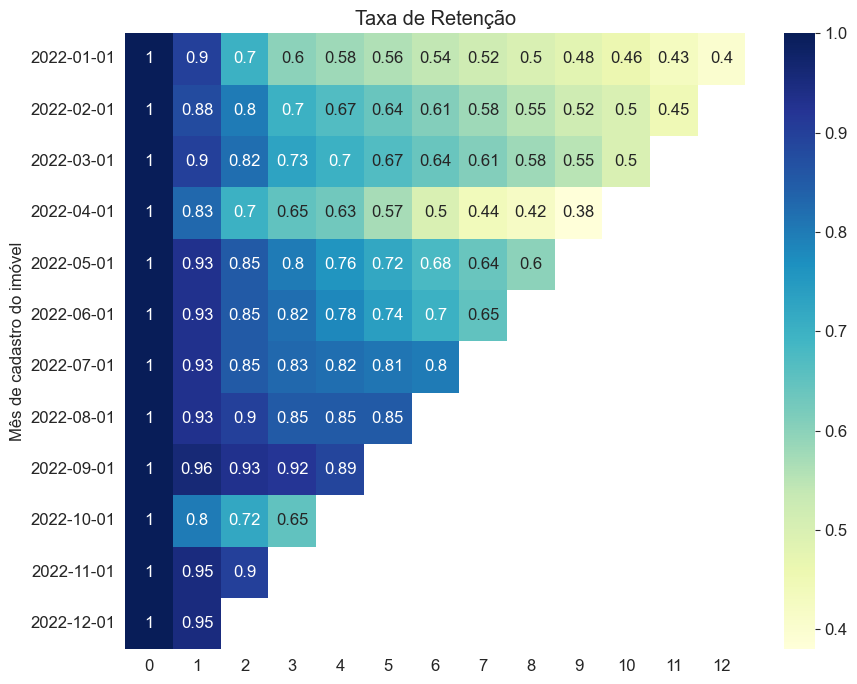

In [34]:
plt.figure(figsize=(10,8))
plt.title("Taxa de Retenção")

sns.heatmap(
    data = cohort, 
    annot = True,
    cmap="YlGnBu",  # escolhendo a paleta de cores
)
plt.show()


A partir do heatmap, podemos ver que os meses de Abril e Outubro têm um padrão de retenção semelhante.

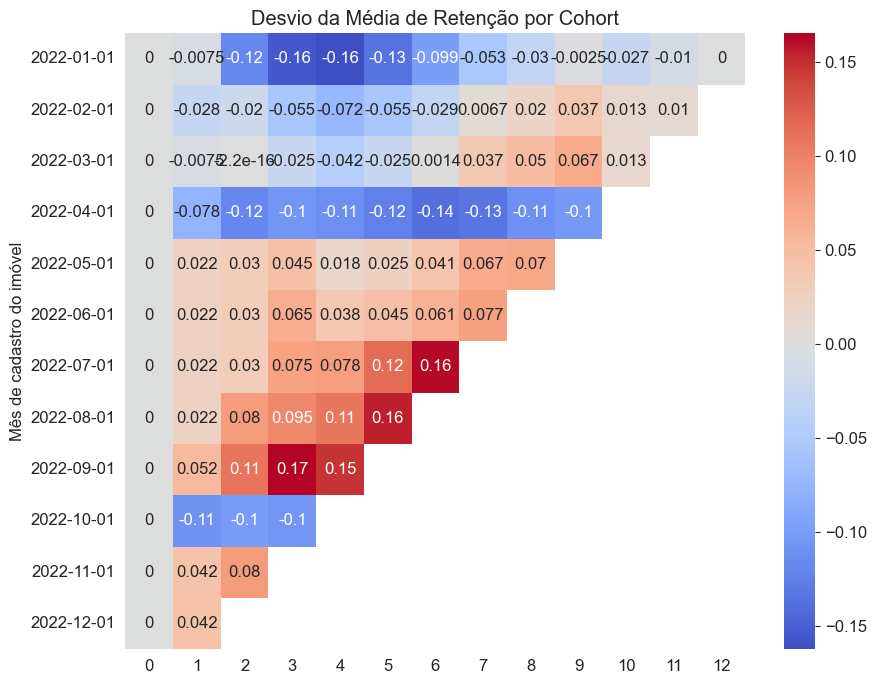

In [35]:
retention_avg = cohort.mean()
deviation_from_avg = cohort - retention_avg
plt.figure(figsize=(10,8))
plt.title("Desvio da Média de Retenção por Cohort")

sns.heatmap(
    data = deviation_from_avg, 
    annot = True,
    cmap="coolwarm", 
    center=0,
)
plt.show()

É possível notar que nos meses de abril e outubro, realmente houve maiores desvios negativos da média, e por outro lado nos meses mais recentes, um maior desvio positivo.

Realizar a projeção do número de reservas nas mesmas hospedagens em 2023, baseando-se nos dados de 2021 e 2022, para cada um dos 4 países da América Latina. Depois de fazer o cálculo, represente graficamente estas projeções.

#### 5. Regressão Linear

Aqui, iremos realizar projeção para o ano de 2023 em cada um dos países observados na américa latina.

In [36]:
def get_estação(date):
    """Retorna a estação do ano baseado em uma data."""
    if (date.month == 12 and date.day >= 21) or (date.month <= 3 and date.day <= 20):
        return 'Verão'
    elif (date.month == 3 and date.day >= 21) or (date.month <= 6 and date.day <= 20):
        return 'Outono'
    elif (date.month == 6 and date.day >= 21) or (date.month <= 9 and date.day <= 22):
        return 'Inverno'
    else:
        return 'Primavera'

# --- 2. Funções de Pré-processamento ---

def PreProcessamento(df):
    """Preprocessa o DataFrame e retorna um novo DataFrame preprocessado."""
    df = df[['Mês', 'Conclusão da reserva']].copy()
    df['mês'] = df['Mês'].dt.month
    df['ano'] = df['Mês'].dt.year
    df['estação'] = df['Mês'].apply(get_estação)
    df.rename(columns = {'Conclusão da reserva':'conclusão'}, inplace = True)
    
    # Criando variáveis dummies
    dummies = pd.get_dummies(df['estação'], drop_first=True).rename(columns=lambda x: 'estação' + str(x))
    df.drop(columns=['estação', 'Mês'], axis=1, inplace=True)
    df = pd.concat([df, dummies], axis=1)
    return df

# --- 3. Funções de Modelagem ---

def RegressaoLinear(df):
    """Cria e treina um modelo de regressão linear e retorna o modelo e os dados de teste."""
    X = df.drop('conclusão', axis=1)
    y = df['conclusão']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression()
    reg.fit(X_train, y_train)
    return reg, X_test, y_test, X_train, y_train

def AvaliarModelo(reg, X_test, y_test, X_train, y_train):
    """Avalia o modelo e imprime métricas."""
    y_pred_test = reg.predict(X_test).astype(int)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    R2 = r2_score(y_test, y_pred_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100
    medae = median_absolute_error(y_test, y_pred_test)
    n = len(X_train)
    k = X_train.shape[1]
    R2_ajustado = 1 - ((1 - R2) * (n - 1)) / (n - k - 1)
    
    print(f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR^2: {R2:.4f}\nR^2 ajustado: {R2_ajustado:.4f}')
    print(f'MAE: {mae:.2f}\nMAPE: {mape:.2f}%\nMedAE: {medae:.2f}')
    
    return y_pred_test
# --- 4. Funções de Visualização ---

def GraficoProjecao(df, reg):
    valores_2021 = df.loc[df['ano'] == 2021, 'conclusão'].tolist()
    valores_2022 = df.loc[df['ano'] == 2022, 'conclusão'].tolist()
    
    data_2023 = {
    'mês': [i for i in range(1, 13)],
    'ano': [2023] * 12,
    'estaçãoOutono': [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],  # Março a Junho
    'estaçãoPrimavera': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],  # Setembro a Dezembro
    'estaçãoVerão': [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]  # Dezembro a Março
    }
    df_2023 = pd.DataFrame(data_2023)

    previsoes_2023 = reg.predict(df_2023)

    # Cores
    azul_marinho = '#001F3F'
    cinza = 'gray'

    # Iniciando o gráfico
    plt.figure(figsize=(14, 7))

    # Plotando os valores
    plt.plot(df_2023['mês'], valores_2021, label='Real 2021', marker='o', color=cinza, linestyle='-')
    plt.plot(df_2023['mês'], valores_2022, label='Real 2022', marker='o', color=azul_marinho, linestyle='-')
    plt.plot(df_2023['mês'], previsoes_2023, label='Previsões 2023', marker='o', color='red', linestyle='--')

    # Índices dos últimos 3 meses
    last_3_months = df_2023['mês'].tail(3).index

    # Adicionando valores nas últimas 3 bolinhas
    offset = max(max(valores_2021), max(valores_2022), max(previsoes_2023)) * 0.05
    for i in last_3_months:
        plt.text(df_2023['mês'][i], valores_2021[i] + offset, f"{valores_2021[i]:,.0f}", ha='center', va='bottom', color=cinza, weight='bold')
        plt.text(df_2023['mês'][i], valores_2022[i] + offset, f"{valores_2022[i]:,.0f}", ha='center', va='bottom', color=azul_marinho, weight='bold')
        plt.text(df_2023['mês'][i], previsoes_2023[i] + offset, f"{previsoes_2023[i]:,.0f}", ha='center', va='bottom', color='red', weight='bold')

    # Título e labels
    plt.title('Projeções de Conclusão de Reservas para 2023 com Dados Reais de 2021 e 2022', fontsize=16, pad=20)
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Conclusão de Reservas', fontsize=14)
    plt.xticks(df_2023['mês'], ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], rotation=45)

    # Refinamentos estéticos
    ax = plt.gca()  # pega o eixo atual
    ax.spines['top'].set_visible(False)  # retira o spine do topo
    ax.spines['right'].set_visible(False)  # retira o spine da direita
    ax.spines['left'].set_color(cinza)  # torna o spine da esquerda cinza
    ax.spines['bottom'].set_color(cinza)  # torna o spine de baixo cinza
    ax.tick_params(colors=cinza)  # torna ticks (marcadores dos eixos) cinza
    ax.yaxis.label.set_color(cinza)  # torna a label do eixo y cinza
    ax.xaxis.label.set_color(cinza)  # torna a label do eixo x cinza
    # Legenda
    plt.legend(fontsize=12, loc='upper left')

    plt.tight_layout()
    plt.show()


#### Brasil

In [37]:
df_br.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,14583827,11521224,10023465,7617833,5256305
1,2021-02-01,14574634,11513961,10017146,7613031,5252991
2,2021-03-01,15303366,12089659,10518004,7993683,5515641
3,2021-04-01,16068534,12694142,11043904,8393367,5791423
4,2021-05-01,16871961,13328849,11596099,8813035,6080994


In [38]:
df_br = PreProcessamento(df_br)
df_br.head()

,conclusão,mês,ano,estaçãoOutono,estaçãoPrimavera,estaçãoVerão
0,5256305,1,2021,0,0,1
1,5252991,2,2021,0,0,1
2,5515641,3,2021,0,0,1
3,5791423,4,2021,1,0,0
4,6080994,5,2021,1,0,0


In [39]:
reg, X_test, y_test, X_train, y_train = RegressaoLinear(df_br)
AvaliarModelo(reg, X_test, y_test, X_train, y_train);

MSE: 631740130361.40
RMSE: 794820.82
R^2: 0.8933
R^2 ajustado: 0.8522
MAE: 648702.20
MAPE: 9.53%
MedAE: 518623.00


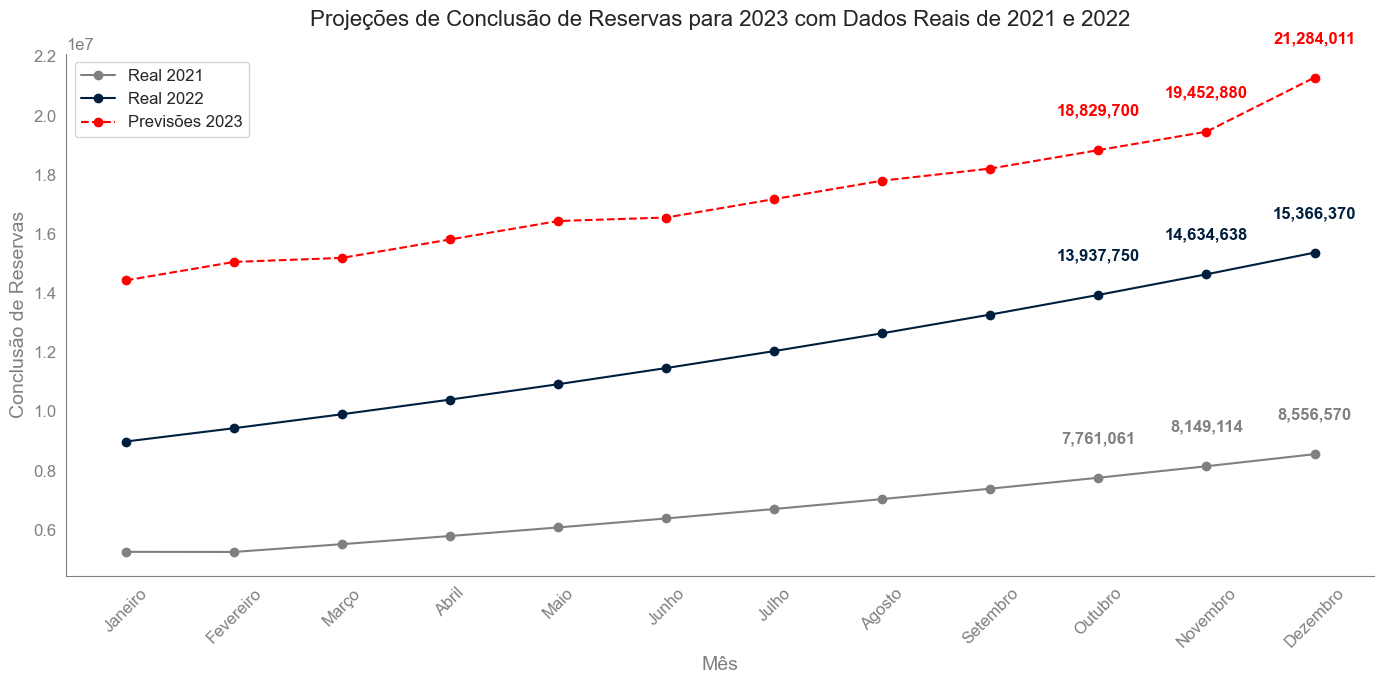

In [40]:
GraficoProjecao(df_br, reg)

#### Colômbia

In [41]:
df_clmb.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,11566484,9368852,5808688,4066082,1463789
1,2021-02-01,11559193,9362946,5805027,4063519,1462867
2,2021-03-01,12137152,9831093,6095278,4266695,1536010
3,2021-04-01,12744010,10322648,6400042,4480029,1612811
4,2021-05-01,13381211,10838781,6720044,4704031,1693451


In [42]:
df_clmb = PreProcessamento(df_clmb)
df_clmb.head()

,conclusão,mês,ano,estaçãoOutono,estaçãoPrimavera,estaçãoVerão
0,1463789,1,2021,0,0,1
1,1462867,2,2021,0,0,1
2,1536010,3,2021,0,0,1
3,1612811,4,2021,1,0,0
4,1693451,5,2021,1,0,0


In [43]:
reg, X_test, y_test, X_train, y_train = RegressaoLinear(df_clmb)
AvaliarModelo(reg, X_test, y_test, X_train, y_train);

MSE: 48992914663.20
RMSE: 221343.43
R^2: 0.8933
R^2 ajustado: 0.8522
MAE: 180652.00
MAPE: 9.53%
MedAE: 144428.00


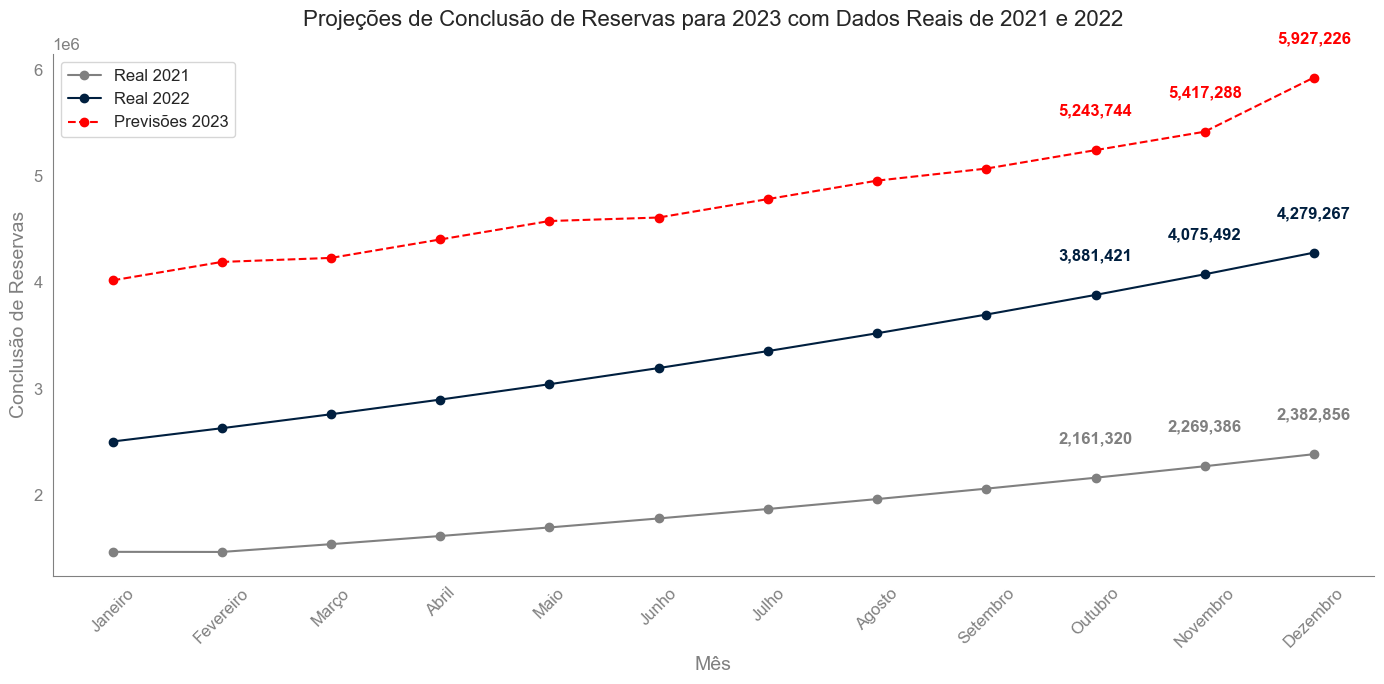

In [44]:
GraficoProjecao(df_clmb, reg)

#### México


In [45]:
df_mxc.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,12371109,7546376,6640811,3918079,3056101
1,2021-02-01,12363311,7541619,6636625,3915609,3054175
2,2021-03-01,12981476,7918700,6968456,4111389,3206884
3,2021-04-01,13630550,8314635,7316879,4316959,3367228
4,2021-05-01,14312077,8730367,7682723,4532807,3535589


In [46]:
df_mxc = PreProcessamento(df_mxc)
df_mxc.head()

,conclusão,mês,ano,estaçãoOutono,estaçãoPrimavera,estaçãoVerão
0,3056101,1,2021,0,0,1
1,3054175,2,2021,0,0,1
2,3206884,3,2021,0,0,1
3,3367228,4,2021,1,0,0
4,3535589,5,2021,1,0,0


In [47]:
reg, X_test, y_test, X_train, y_train = RegressaoLinear(df_mxc)
AvaliarModelo(reg, X_test, y_test, X_train, y_train);

MSE: 213556730032.40
RMSE: 462121.99
R^2: 0.8932
R^2 ajustado: 0.8522
MAE: 377166.40
MAPE: 9.53%
MedAE: 301536.00


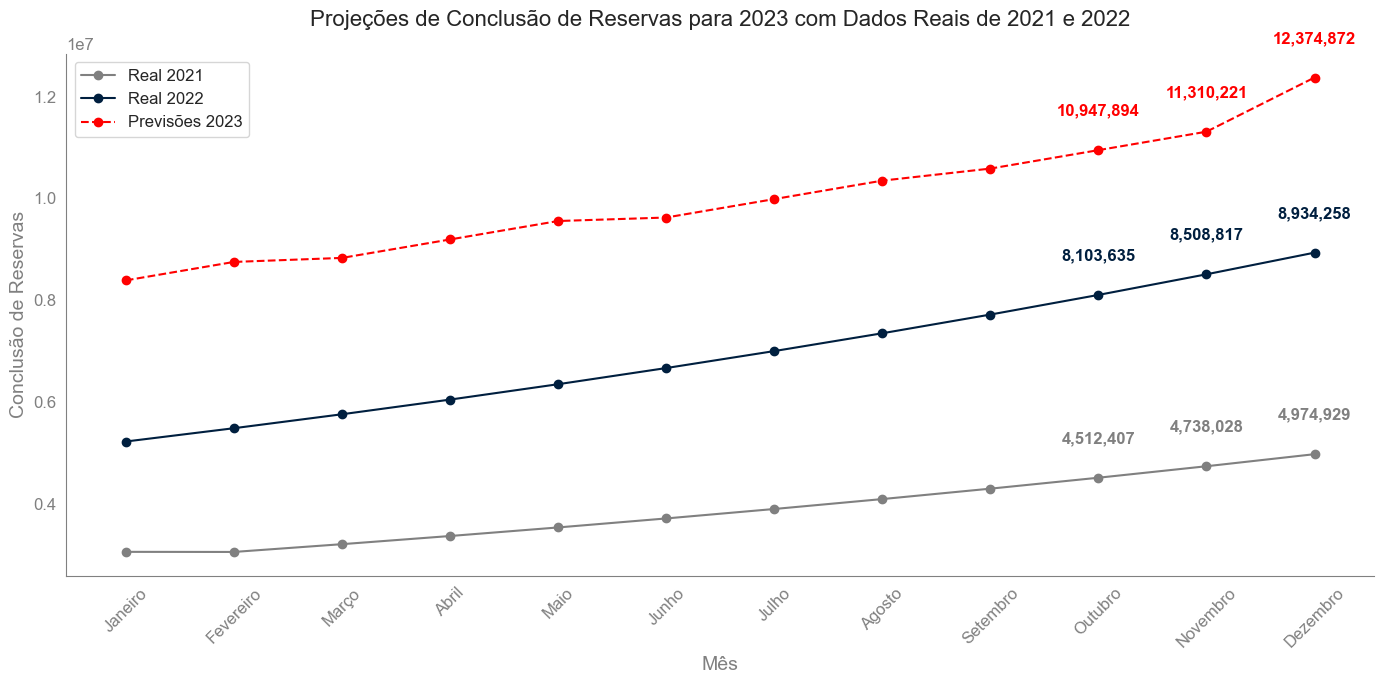

In [48]:
GraficoProjecao(df_mxc, reg)

#### Argentina

In [49]:
df_agt.head()

,Mês,Home,Resultado de busca,Detalhes do imóvel,Check-out,Conclusão da reserva
0,2021-01-01,10057812,7543359,4903183,2647719,1191474
1,2021-02-01,10051472,7538604,4900093,2646050,1190723
2,2021-03-01,10554046,7915534,5145097,2778353,1250259
3,2021-04-01,11081748,8311311,5402352,2917270,1312772
4,2021-05-01,11635835,8726876,5672470,3063134,1378410


In [50]:
df_agt = PreProcessamento(df_agt)
df_agt.head()

,conclusão,mês,ano,estaçãoOutono,estaçãoPrimavera,estaçãoVerão
0,1191474,1,2021,0,0,1
1,1190723,2,2021,0,0,1
2,1250259,3,2021,0,0,1
3,1312772,4,2021,1,0,0
4,1378410,5,2021,1,0,0


In [51]:
reg, X_test, y_test, X_train, y_train = RegressaoLinear(df_agt)
AvaliarModelo(reg, X_test, y_test, X_train, y_train);

MSE: 32459804194.20
RMSE: 180166.05
R^2: 0.8933
R^2 ajustado: 0.8522
MAE: 147044.60
MAPE: 9.53%
MedAE: 117559.00


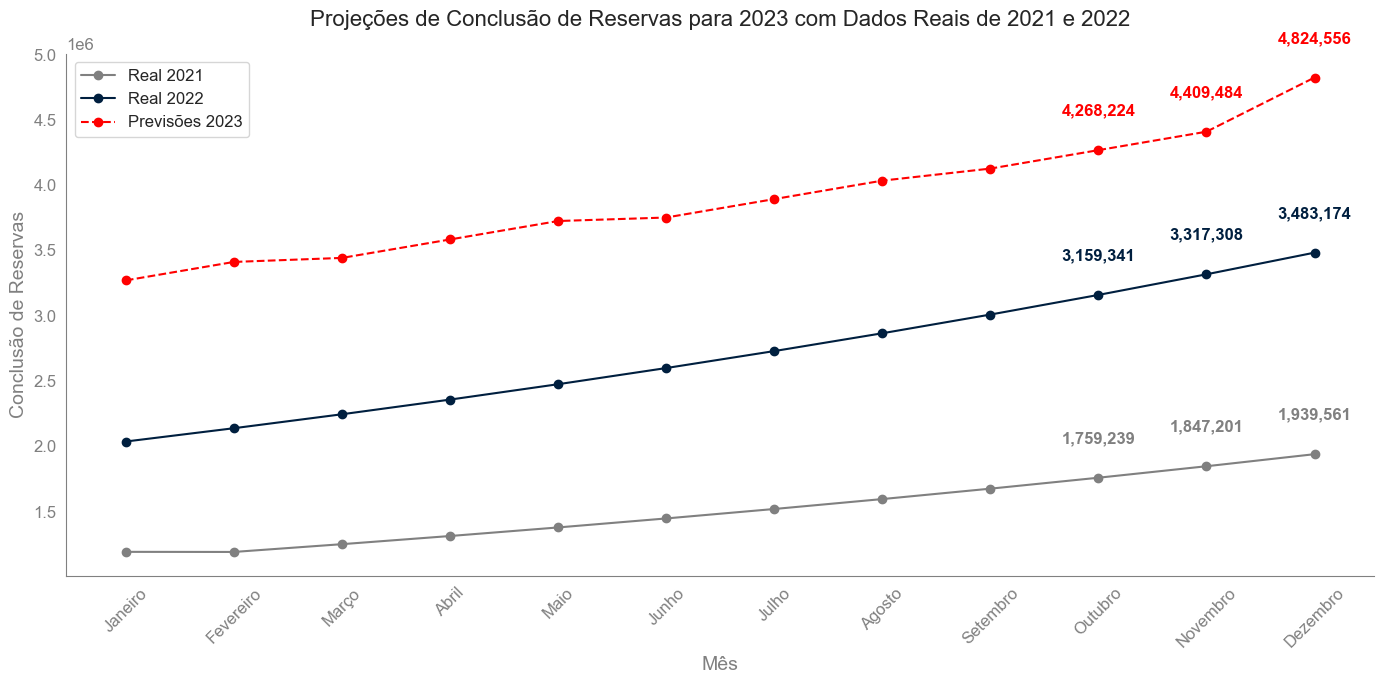

In [52]:
GraficoProjecao(df_agt, reg)

### Conclusão

* Todos os modelos de regressão linear para os quatro países apresentam um bom ajuste aos dados, com um valor de R^2 próximo de 0.8933.
* O Brasil apresenta o RMSE mais alto, indicando maior erro no modelo em relação aos outros países.
* A Argentina apresenta o menor RMSE, indicando que é o modelo que melhor se ajusta aos dados reais quando comparado aos outros.
* O MAPE consistente de 9.53% em todos os países sugere que a porcentagem de erro do modelo em relação ao valor real é relativamente baixa, indicando uma boa precisão do modelo.